# 전복 나이 예측 경진대회 EDA

안녕하세요! 전복 나이 예측 경진대회로 돌아온 데이콘 Basic 입니다!

이번 대회는 주어진 전복의 특성 데이터를 통해 나이(target)를 예측하는 대회입니다.

대회를 시작하기 앞서 어떤 데이터가 주어졌고 어떤 방식으로 활용할 수 있을지 데이터를 분석하고 시각화하며 인사이트를 얻어내는 작업이 필요합니다.

# 데이터 불러오기 전처리

## 데이터 불러오기

먼저 주어진 데이터를 불러오고 확인합니다.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [3]:
train = pd.read_csv('./train.csv')  # 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.

In [19]:
train.head() # 데이터 상위 5개를 확인합니다.

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [20]:
train.shape # 데이터를 모양을 확인합니다.

(1253, 10)

데이터를 보아하니 10개의 열과 1253개의 행을 가진 데이터 입니다.

고유번호인 id를 제외하면 8가지의 피쳐와 1가지의 타겟이 존재합니다.

피쳐에는 카테고리형 데이터 Gender와 나머지 수치형 데이터 7가지가 존재합니다.

## 데이터 결측치 확인

결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

데이터에 결측치가 있는지 확인해보도록 하겠습니다.

In [21]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


결측치가 존재하지 않습니다.

별도의 결측치 처리는 하지 않아도 되겠습니다.

## 데이터의 고유번호 id 값 처리

데이터를 살펴보면 고유번호 id 값이 존재하는 것을 확인할 수 있습니다.

id 값은 기본적으로 인덱스(데이터의 위치를 포함하는 자료 구조)이기 때문에 분석을 할 때는 데이터의 위치를 필요로 하지 않습니다.

따라서 데이터프레임에서 id 값을 제거를 해줍니다.

In [22]:
train = train.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.

In [23]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


## Target(나이) 분포 확인

데이터에서 Target(나이)의 분포를 살펴보겠습니다.

Target의 데이터 값이 무엇이 있는지 unique() 메소드를 통하여 확인해보겠습니다.

In [11]:
temp = train['Target'].unique() # Target의 중복되지 않은 값을 출력합니다.
np.sort(temp) # 오름차순으로 정렬합니다.

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29])

나이가 3세 ~ 23세 까지 그리고 29세가 데이터에 존재하는 것을 확인하였습니다.

그렇다면 Target 분포의 특성을 알기 위하여 나이 별 전복의 개수를 알아보겠습니다.

In [14]:
train.groupby('Target').count().iloc[:,0] # Target 값 별로 데이터의 개수를 세어줍니다.

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

수치를 보면 10살이 202개로 가장 많은 것을 확인할 수 있습니다. 

수치로 한눈에 알아보기 힘드므로 그래프를 그려보겠습니다.

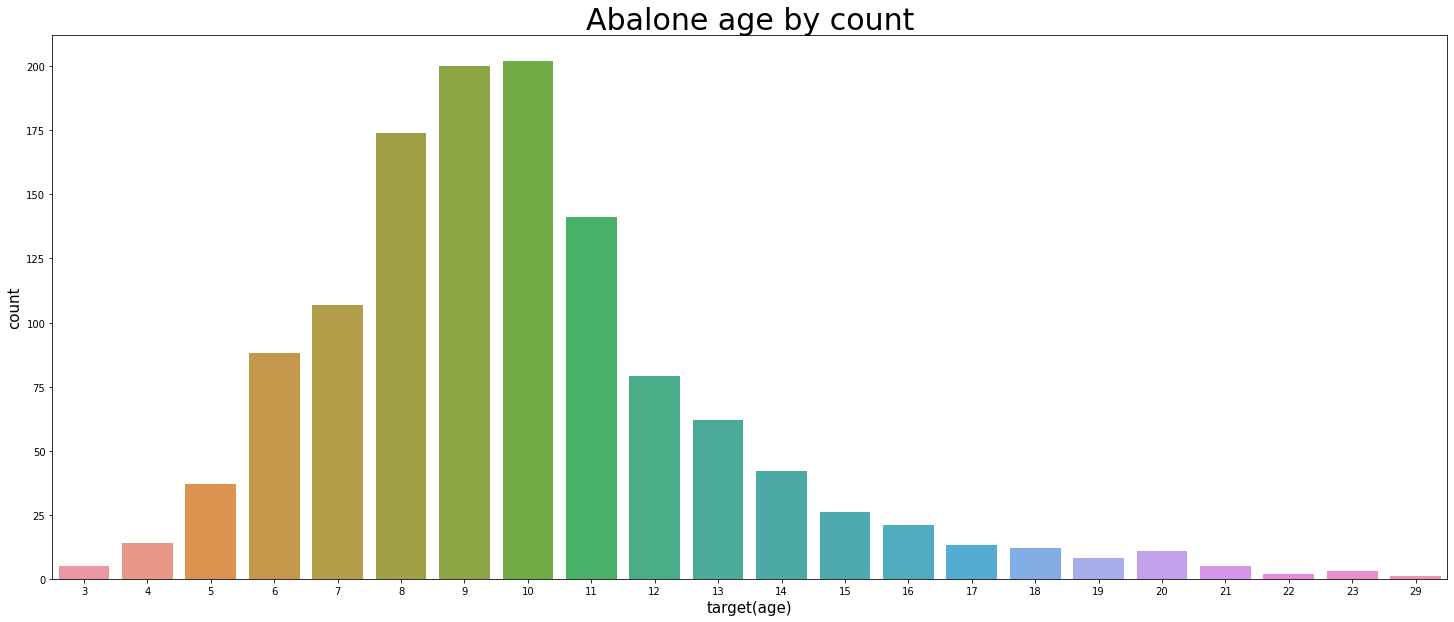

In [39]:
# 전복의 나이 분포 시각화
plt.rcParams['figure.figsize'] = [25,10]
sns.countplot('Target' , data=train)
plt.title('Abalone age by count', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

9~10세를 중심으로 분포를 형성되어있는 것을 확인 할 수 있습니다.

극단적으로 데이터를 비교해보면 가장 나이가 많은 23, 29세와 가장 나이가 적은 3세의 데이터를 데이터프레임 상으로 나타내보겠습니다.

In [ ]:
temp1 = train['Target'] == 29
temp2 = train['Target'] == 23
train[temp1 | temp2] # 가장 나이가 많은 29세와 23세의 데이터 프레임을 합쳐서 보겠습니다.

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
553,F,0.45,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
762,F,0.70,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
1131,F,0.55,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1234,F,0.49,0.385,0.150,0.7865,0.2410,0.1400,0.240,23


In [ ]:
train[train['Target'] == 3] # 가장 나이가 작은 3세의 데이터 프레임을 보겠습니다.

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
20,M,0.155,0.11,0.040,0.0155,0.0065,0.003,0.005,3
210,I,0.195,0.15,0.045,0.0375,0.0180,0.006,0.011,3
285,I,0.130,0.10,0.030,0.0130,0.0045,0.003,0.004,3
463,I,0.110,0.09,0.030,0.0080,0.0025,0.002,0.003,3
1013,I,0.180,0.13,0.045,0.0275,0.0125,0.010,0.009,3


데이터 프레임 상으로도 23,29세에 비하여 3세의 전복이 전반적으로 수치가 낮은 것을 확인해 볼 수 있습니다.

또한 Gender가 23, 29세인 전복이 모두 F이므로 Gender 분포를 확인해보도록 하겠습니다.

Gender는 카테고리형 변수 이므로 따로 데이터를 시각화 해보도록 하겠습니다.

In [ ]:
# 전체의 데이터 타입을 확인
train.dtypes

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

# 데이터 기초 통계 분석

## 카테고리형 데이터 Gender 시각화

Gender의 데이터 값이 무엇이 있는지 unique() 메소드를 통하여 확인해보겠습니다.

In [33]:
print(train['Gender'].unique()) # Gender의 중복되지 않은 값을 출력합니다.

['M' 'I' 'F']


전복은 일반적으로 사람의 양성 체계와는 다르게,

성별이 M, I, F 로 세개로 나뉘어져 있군요!

그렇다면 Gender 각 성별의 데이터 개수를 확인해보도록 하겟습니다.

In [34]:
train.groupby('Gender').count().iloc[:,0]

Gender
F    380
I    404
M    469
Name: Lenght, dtype: int64

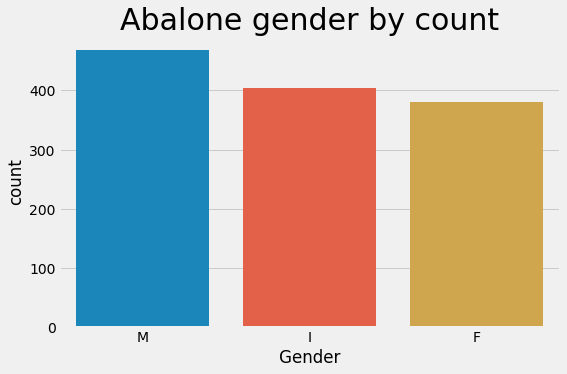

In [54]:
# 성별 데이터 개수 그래프
plt.rcParams['figure.figsize'] = [8,5]
sns.countplot('Gender', data=train)
plt.title('Abalone gender by count', fontsize=30)
plt.show()

데이터에서 M성별이 가장 많고 F성별이 가장 적은 것을 확인하였습니다.

다음으로 성별별로 나이의 분포를 살펴보겠습니다.

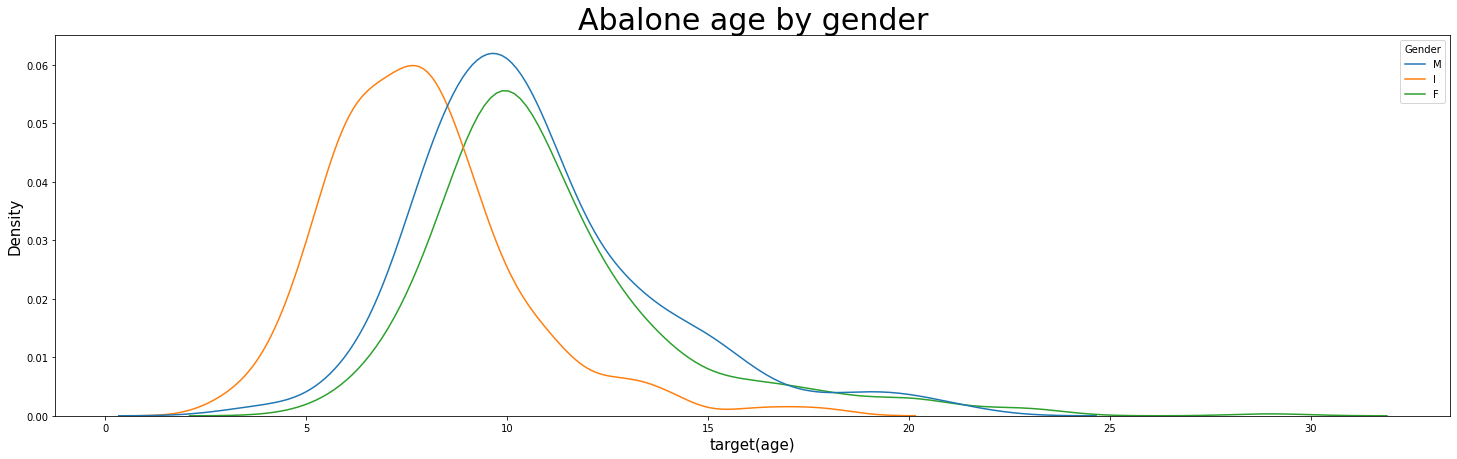

In [38]:
# 성별에 따른 나이 분포 그래프
plt.rcParams['figure.figsize'] = [25,7]
sns.kdeplot('Target', hue='Gender', data=train)
plt.title('Abalone age by gender', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

성별에 따른 나이 분포를 보면

I가 가장 왼쪽으로 치우쳐져 있는 것을 보아 세개의 성별중 가장 적은 나이를 살고 있고

그 다음으로 M, F 순으로 오래 사는 것을 확인해 볼 수 있습니다.

## 수치형 데이터 시각화

이제 수치형 데이터의 통계치를 알아보겠습니다.

pandas의 DataFrame은 describe이라는 메소드를 통해 각 컬럼의 평균값, 최대치, 최소치, 편차 등을 알아보겠습니다.

In [41]:
data_description = train.describe()
data_description

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


### 데이터 분포 확인하기

숫자로만 봐서는 분포를 가늠하기 힘듭니다

각각의 데이터 분포를 히스토그램으로 그려보겠습니다.

각 데이터의 히스토그램에 평균(빨강)과 중앙값(초록)을 선으로 표시해보겠습니다.

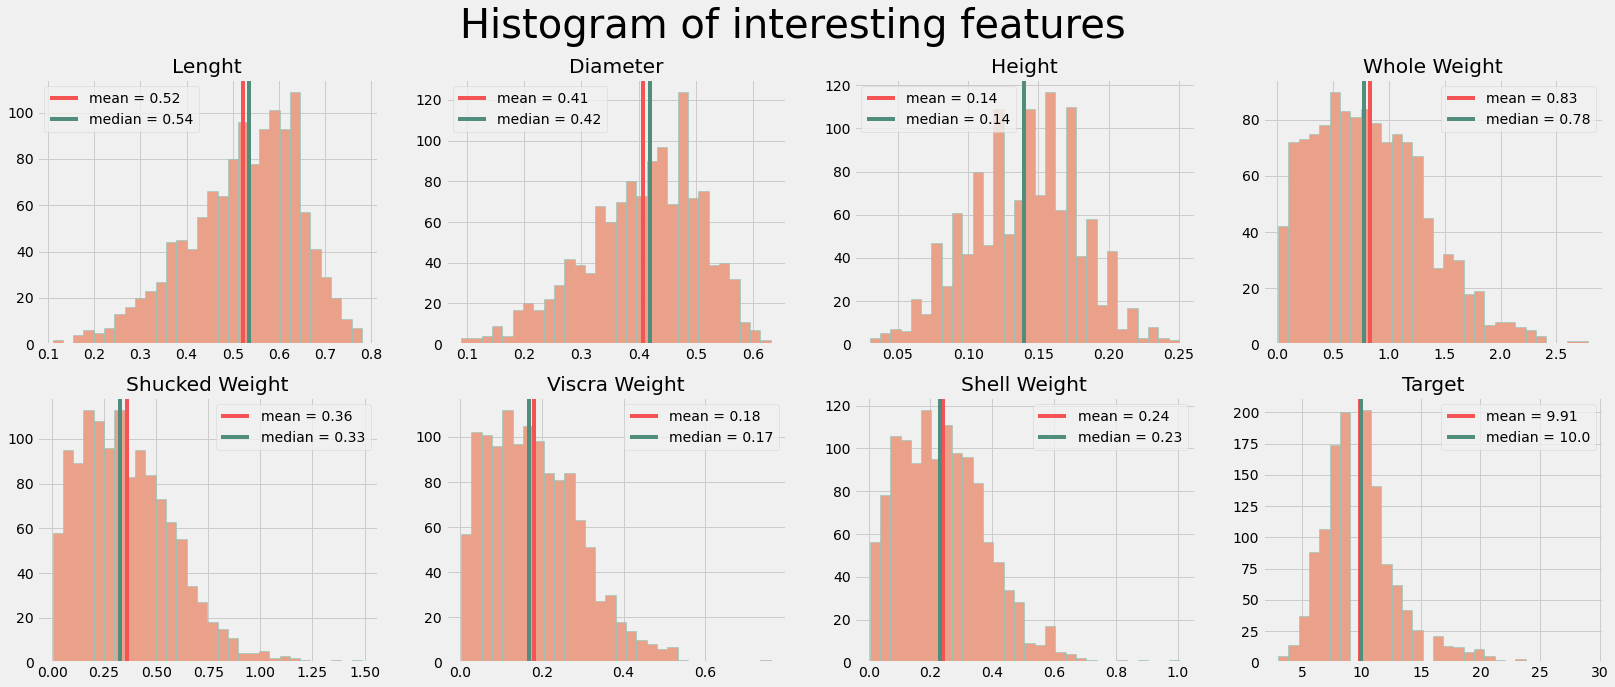

In [42]:
# 수치형 데이터 통계치 그래프
interest_coloumns = train.columns[1:]
plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(2, 4, figsize = (25, 10))
fig.suptitle('Histogram of interesting features', fontsize=40)
column_idx = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist(train[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1

In [68]:
print('전복의 평균 나이는', round(data_description[interest_coloumns[7]]['mean'],1), '입니다') #round를 하여 소수점 1의 자리까지 반올림 하였습니다.

전복의 평균 나이는 9.9 입니다


Target을 보면 전복의 평균 나이는 약 9.9세라는 것을 알 수 있고

전복의 무게가 좌편향 되어있는 것을 보아

무게가 많이 나가는 전복들이 평균에 비하여 드물게 존재한다라는 인사이트를 얻을 수 있습니다.

### 타겟(나이)와 상관관계 확인하기

타겟인 나이와 나머지 변수들의 어떤 상관관계 있는지 확인 하기 위하여 

데이터를 이용하여 그래프를 그려보겠습니다.

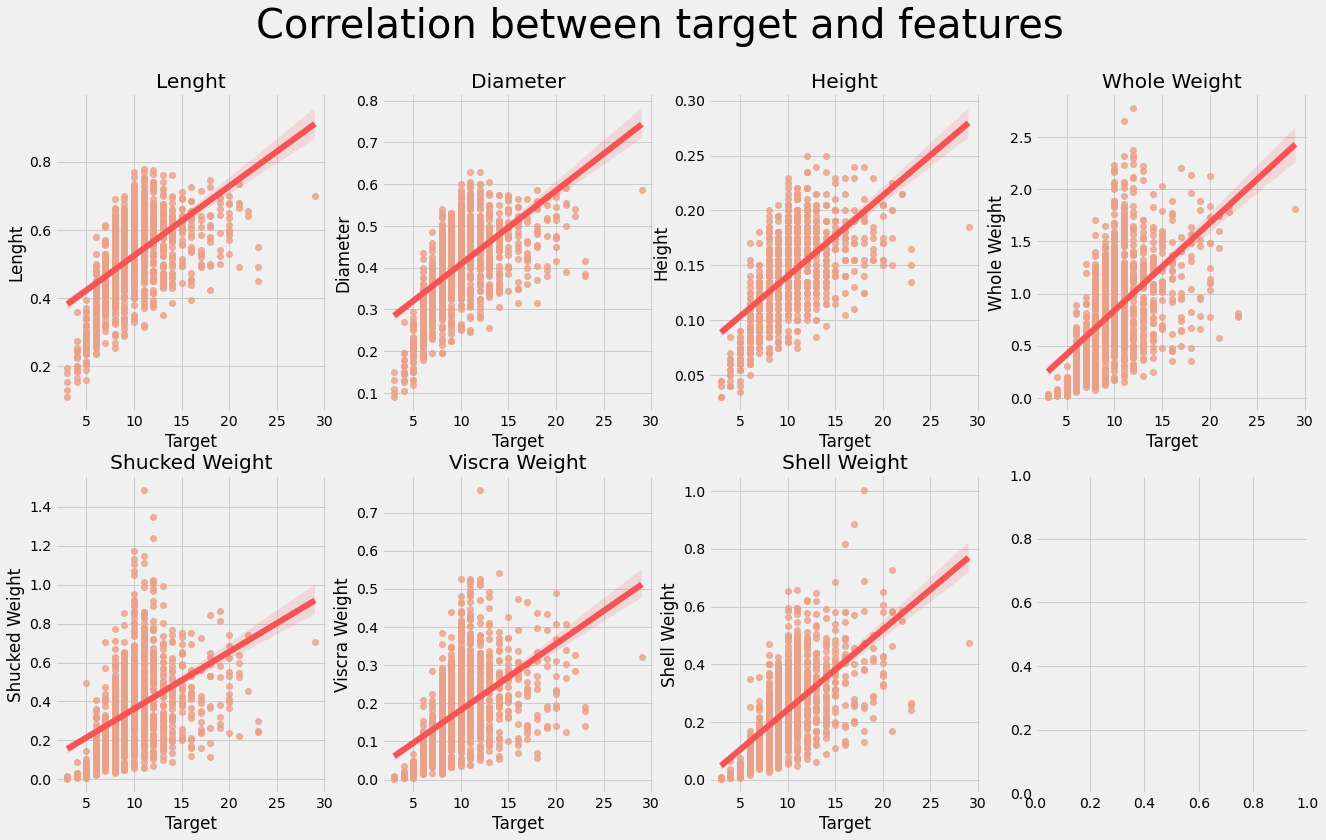

In [58]:
# 수치형 데이터 분포 Target과 상관관계 그래프
def visualize(axx, yfield):
  sns.regplot(x='Target', y=yfield, data=train,  color='#eaa18a', line_kws=  {'color': '#f55354'} , ax = axx) # regplot을 이용하여 추세선과 산점도 그래프를 그려줍니다.
  axx.set_title(yfield)

figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,12)
figure.suptitle('Correlation between target and features', fontsize=40)
for i in range(len(train.columns[1:-1])):
  visualize(eval(f'ax{i+1}'), train.columns[i+1])

그래프를 통하여 Target(age)와 Lenght, Diameter, Height, Whole Weight, Sucked Weight, Wiscra Weight, Shell Weight 피쳐들 관계의 추세선을 확인해 보아,

모두 왼쪽 위 방향을 향하고 있으므로 양의 상관관계를 가지고 있음을 도출하였습니다.

### 히트맵 그려보기

피어슨 상관관계 분석 방법을 이용하여,

feature들 간의 상관관계를 히트맵을 그려 어떤 컬럼들이 높은 상관관계를 갖는지 알아보겠습니다.

In [44]:
# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train.drop(columns=['Gender'],axis=1)
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

Text(0.5, 1.0, 'Correlation between features')

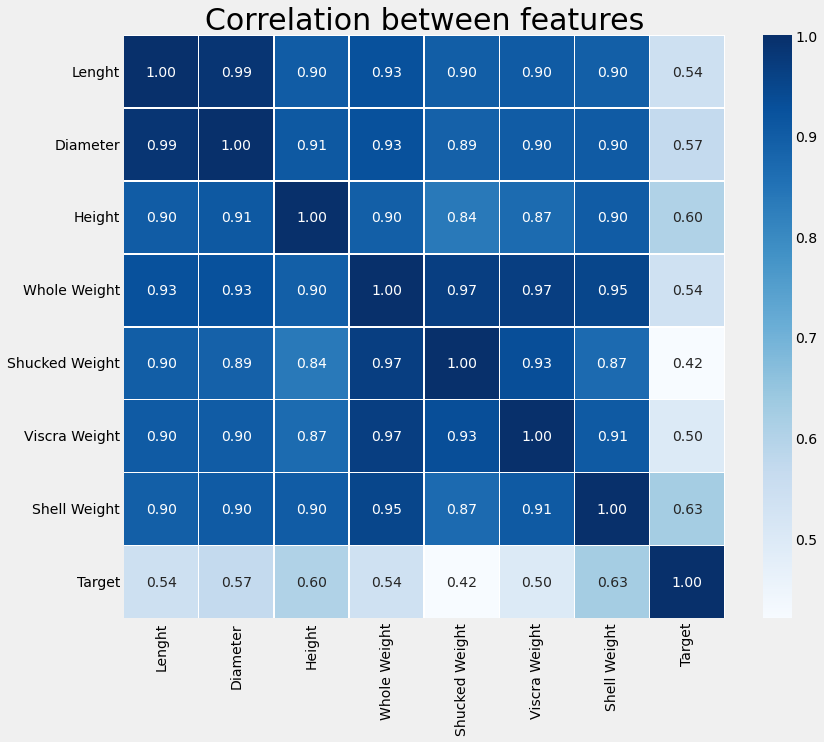

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

feature가 많아서 헷갈리니 Target과의 관계만을 살펴보겠습니다.



In [ ]:
# Target과 피쳐들의 상관관계
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending=False), columns=['Target'])
df_temp28.style.background_gradient(cmap='viridis')

,Target
Target,1.000000
Shell Weight,0.625819
Height,0.604654
Diameter,0.567933
Lenght,0.543789
Whole Weight,0.538404
Viscra Weight,0.497283
Shucked Weight,0.420126


우리가 가장 관심있는 것은 전복의 나이와 어떤 컬럼이 가장 상관관계가 높은가 입니다.

그래프를 보니 shell Weight가 가장 높은 양의 상관관계가 있는것으로 나타났네요!

이는 나이가 많을수록 껍질의 무게가 무거워진다는 것으로 해석할 수 있겠습니다.

또한 상관계수가 0.3 이상이면 유의미한 양의 상관관계를 가진다고 해석할 수 있습니다.

그러므로 다른 피쳐들도 상관계수가 0.3 이상이기 때문에 나이가 많을 수록 높이, 지름 길이, 무게가 커진다는 결론을 도출 할 수 있겠습니다.

여러분은 어떤 인사이트를 얻으셨나요?

이번 EDA를 통해 어떤 방식으로 분석을 진행해야겠다는 자그마한 인사이트를 얻으셨으면 좋겠습니다.

여러분도 여러분만의 EDA를 진행하시고 코드공유에 올려주세요!

좋아요와 댓글을 합산하여 가장 높은 점수를 얻으신 분께 데이콘 후드가 제공됩니다!